In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip install --upgrade scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/bc/b9/6a637668d69de04b7f8b917e837aff282950601f09998a5f6c9f23f6642d/scikit_learn-1.4.1.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 73.2 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
import sklearn
print(sklearn.__version__)


1.2.2


In [4]:

train_data = pd.read_csv("/kaggle/input/fraud-detection/fraudTrain.csv")
test_data = pd.read_csv("/kaggle/input/fraud-detection/fraudTest.csv")

In [5]:
train_data = train_data[["trans_date_trans_time","amt","category","gender","is_fraud"]]
test_data = test_data[["trans_date_trans_time","amt","category","gender","is_fraud"]]

In [6]:
train_data.is_fraud.value_counts()[1]

7506

In [7]:
majority = train_data[train_data["is_fraud"]==0]
minority = train_data[train_data["is_fraud"]==1]
upsample = resample(minority,replace=True,n_samples=len(majority))
train_data = pd.concat([majority,upsample])

## PREPARE FOR MODELING

In [8]:
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])
test_data["trans_date_trans_time"] = pd.to_datetime(test_data["trans_date_trans_time"])

In [9]:
train_data['hour'] = train_data['trans_date_trans_time'].dt.hour
test_data['hour'] = test_data['trans_date_trans_time'].dt.hour

train_data['day'] = train_data['trans_date_trans_time'].dt.day
test_data['day'] = test_data['trans_date_trans_time'].dt.day

train_data['month'] = train_data['trans_date_trans_time'].dt.month
test_data['month'] = test_data['trans_date_trans_time'].dt.month

In [10]:

train_data.drop("trans_date_trans_time",axis=1,inplace=True)
test_data.drop("trans_date_trans_time",axis=1,inplace=True)

In [11]:

train_data['gender'] = train_data['gender'].map({'F':0,'M':1})
test_data['gender'] = test_data['gender'].map({'F':0,'M':1})

In [12]:
from sklearn.preprocessing import LabelEncoder

# Assume you have already applied LabelEncoder to 'category' column
le = LabelEncoder()

# Fit and transform on the training data
train_data['category'] = le.fit_transform(train_data['category'])

# Transform on the test data (using the same LabelEncoder instance)
test_data['category'] = le.transform(test_data['category'])

# Get the mapping between category names and labels
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mapping
for category_name, label in label_mapping.items():
    print(f"Category Name: {category_name}, Label: {label}")


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  # ensure correct sparse format
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  f" You provided 'accept_sparse={accept_sparse}'."


Category Name: entertainment, Label: 0
Category Name: food_dining, Label: 1
Category Name: gas_transport, Label: 2
Category Name: grocery_net, Label: 3
Category Name: grocery_pos, Label: 4
Category Name: health_fitness, Label: 5
Category Name: home, Label: 6
Category Name: kids_pets, Label: 7
Category Name: misc_net, Label: 8
Category Name: misc_pos, Label: 9
Category Name: personal_care, Label: 10
Category Name: shopping_net, Label: 11
Category Name: shopping_pos, Label: 12
Category Name: travel, Label: 13


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  # ensure correct sparse format
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  f" You provided 'accept_sparse={accept_sparse}'."


In [13]:
test_data

,amt,category,gender,is_fraud,hour,day,month
0,2.86,10,1,0,12,21,6
1,29.84,10,0,0,12,21,6
2,41.28,5,0,0,12,21,6
3,60.05,9,1,0,12,21,6
4,3.19,13,1,0,12,21,6
...,...,...,...,...,...,...,...
555714,43.77,5,1,0,23,31,12
555715,111.84,7,1,0,23,31,12
555716,86.88,7,0,0,23,31,12
555717,7.99,13,1,0,23,31,12


In [14]:
X_train = train_data.drop('is_fraud',axis=1)
X_test = test_data.drop('is_fraud',axis=1)
y_train = train_data['is_fraud']
y_test = test_data['is_fraud']

#### (optional) SCALE DỮ LIỆU ĐỂ ĐƯA VỀ CHUNG 1 PHÂN PHỐI

In [15]:
# sử dụng standard scale về phân phối chuẩn
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  When order is None (default), then if copy=False, nothing is ensured
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  # ensure correct sparse format
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  f" You provided 'accept_sparse={accept_sparse}'."
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  When order is None (defaul

## MODELING

In [16]:
rf= RandomForestClassifier()
rf_model=rf.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  # ensure correct sparse format
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  f" You provided 'accept_sparse={accept_sparse}'."


## EVALUATE MODEL (OPTIONAL)

In [17]:
from sklearn.metrics import confusion_matrix, precision_score,recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
print(classification_report(y_test,rf_model.predict(X_test)))

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  # ensure correct sparse format
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  f" You provided 'accept_sparse={accept_sparse}'."
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  # ensure correct sparse format
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  f" You provided 'accept_sparse={accept_sparse}'."
/opt/conda/lib

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.78      0.70      0.74      2145

    accuracy                           1.00    555719
   macro avg       0.89      0.85      0.87    555719
weighted avg       1.00      1.00      1.00    555719



In [24]:
confusion_matrix(y_test,rf_model.predict(X_test))

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  # ensure correct sparse format
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  f" You provided 'accept_sparse={accept_sparse}'."
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  # ensure correct sparse format
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  f" You provided 'accept_sparse={accept_sparse}'."
/opt/conda/lib

array([[553161,    413],
       [   645,   1500]])

In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print("Accuracy:", accuracy)


Accuracy: 0.9980961601096957


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  # ensure correct sparse format
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  f" You provided 'accept_sparse={accept_sparse}'."
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  # ensure correct sparse format
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  f" You provided 'accept_sparse={accept_sparse}'."
/opt/conda/lib

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  # ensure correct sparse format
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  f" You provided 'accept_sparse={accept_sparse}'."
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  # ensure correct sparse format
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  f" You provided 'accept_sparse={accept_sparse}'."
/opt/conda/lib

<Axes: >

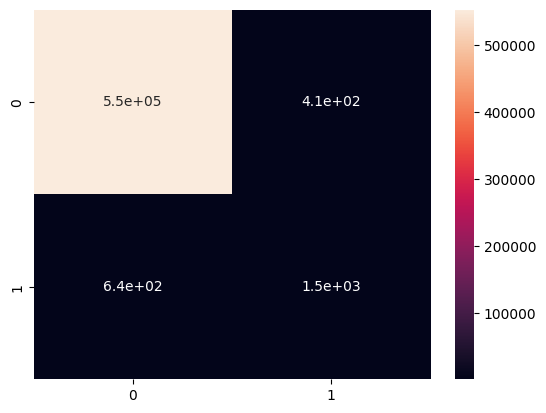

In [26]:
sns.heatmap(confusion_matrix(y_test,rf_model.predict(X_test)),annot=True)

In [22]:
import pickle
with open('rfmodel.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)


In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm_model = svm.fit(X_train, y_train)
print(classification_report(y_test,svm_model.predict(X_test)))

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  # ensure correct sparse format
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  f" You provided 'accept_sparse={accept_sparse}'."


In [ ]:
accuracy = accuracy_score(y_test, svm_model.predict(X_test))
print("Accuracy:", accuracy)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg_model = log_reg.fit(X_train, y_train)
print(classification_report(y_test,log_reg_model.predict(X_test)))

In [ ]:
accuracy = accuracy_score(y_test, log_reg_model.predict(X_test))
print("Accuracy:", accuracy)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier()
grad_boost_model = grad_boost.fit(X_train, y_train)
print(classification_report(y_test,grad_boost_model.predict(X_test)))

In [ ]:
accuracy = accuracy_score(y_test, grad_boost_model.predict(X_test))
print("Accuracy:", accuracy)